In [1]:
import Function as F
import DefineFiles as D
import importlib
import tracking as tr
importlib.reload(F)
importlib.reload(D) 
importlib.reload(tr)
from Function import *
from DefineFiles import *
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import ruptures as rpt
import tracking as tr


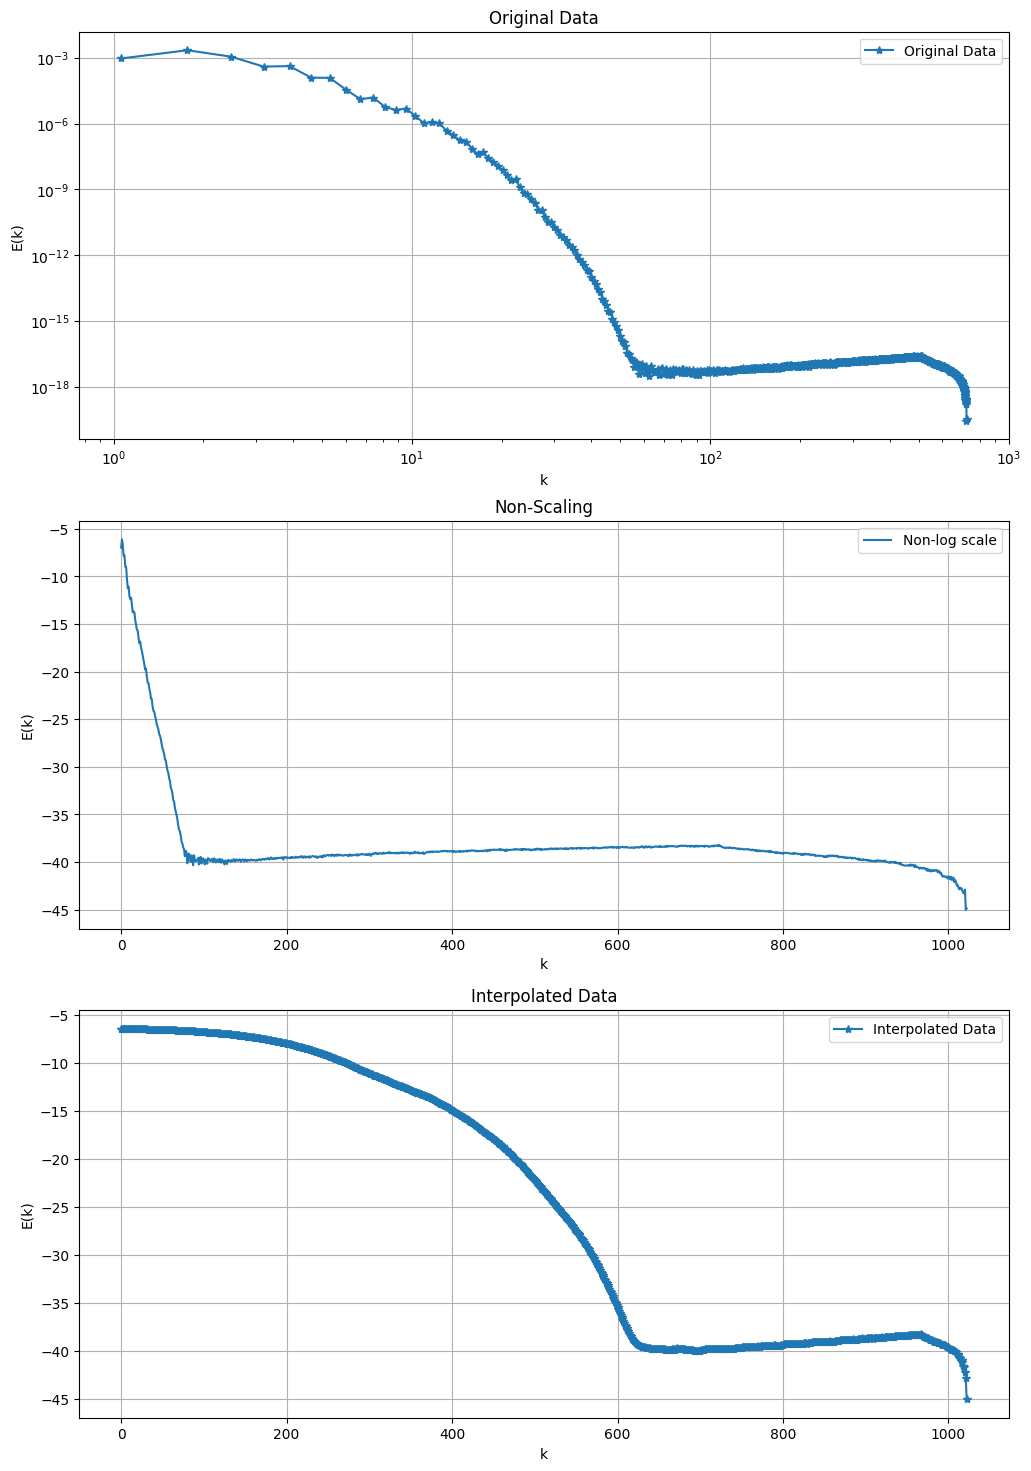

In [2]:
file = '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt'
k, ek = get_ek(file)
k = k[1:]
ek = ek[1:]

log_k = np.log(k)
log_E = np.log(ek)

window_length = 15
polyorder = 3
smoothed_log_E = savgol_filter(log_E, window_length, polyorder)

new_log_k = np.linspace(log_k.min(), log_k.max(), 1023)
interp_func = interp1d(log_k, smoothed_log_E, kind='linear', fill_value='extrapolate')
new_log_E = interp_func(new_log_k)
new_k = np.exp(new_log_k) 
new_E = np.exp(new_log_E)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Original Data
axes[0].loglog(k, ek, marker='*', label='Original Data')
axes[0].set_xlabel('k')
axes[0].set_ylabel('E(k)')
axes[0].set_title('Original Data')
axes[0].grid()
axes[0].legend()

# Interpolated Data
axes[2].plot(new_log_E, marker='*', label='Interpolated Data')
axes[2].set_xlabel('k')
axes[2].set_ylabel('E(k)')
axes[2].set_title('Interpolated Data')
axes[2].grid()
axes[2].legend()

# Non-log scale
axes[1].plot(log_E, label='Non-log scale')
axes[1].set_xlabel('k')
axes[1].set_ylabel('E(k)')
axes[1].set_title('Non-Scaling')
axes[1].grid()
axes[1].legend()

plt.show()

### Tracking ###

Tracking 1
Found segments:
Segment 1: indices 0 to 15, k from 1.06e+00 to 1.10e+01
Segment 2: indices 15 to 45, k from 1.17e+01 to 3.22e+01
Segment 3: indices 45 to 215, k from 3.29e+01 to 1.52e+02
Segment 4: indices 215 to 540, k from 1.53e+02 to 3.82e+02
Segment 5: indices 540 to 830, k from 3.83e+02 to 5.87e+02
Segment 6: indices 830 to 900, k from 5.88e+02 to 6.37e+02
Segment 7: indices 900 to 1023, k from 6.37e+02 to 7.24e+02
Tracking 2
Found segments:
Segment 1: indices 0 to 195, k from 1.06e+00 to 3.66e+00
Segment 2: indices 195 to 395, k from 3.68e+00 to 1.31e+01
Segment 3: indices 395 to 625, k from 1.32e+01 to 5.70e+01
Segment 4: indices 625 to 835, k from 5.74e+01 to 2.18e+02
Segment 5: indices 835 to 990, k from 2.19e+02 to 5.86e+02
Segment 6: indices 990 to 1023, k from 5.90e+02 to 7.24e+02


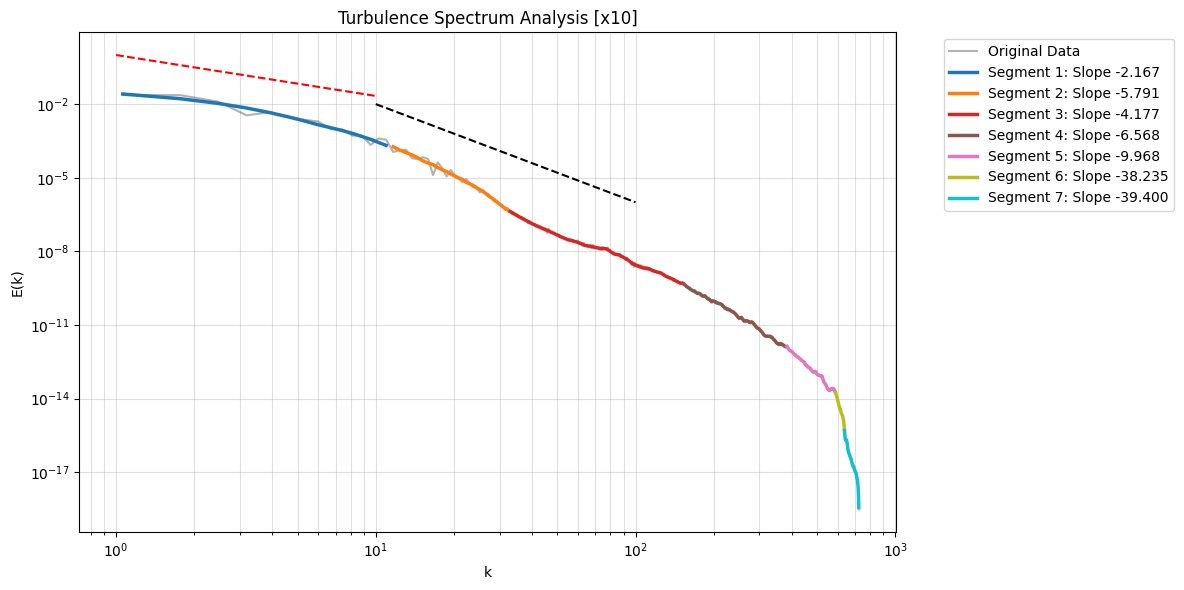

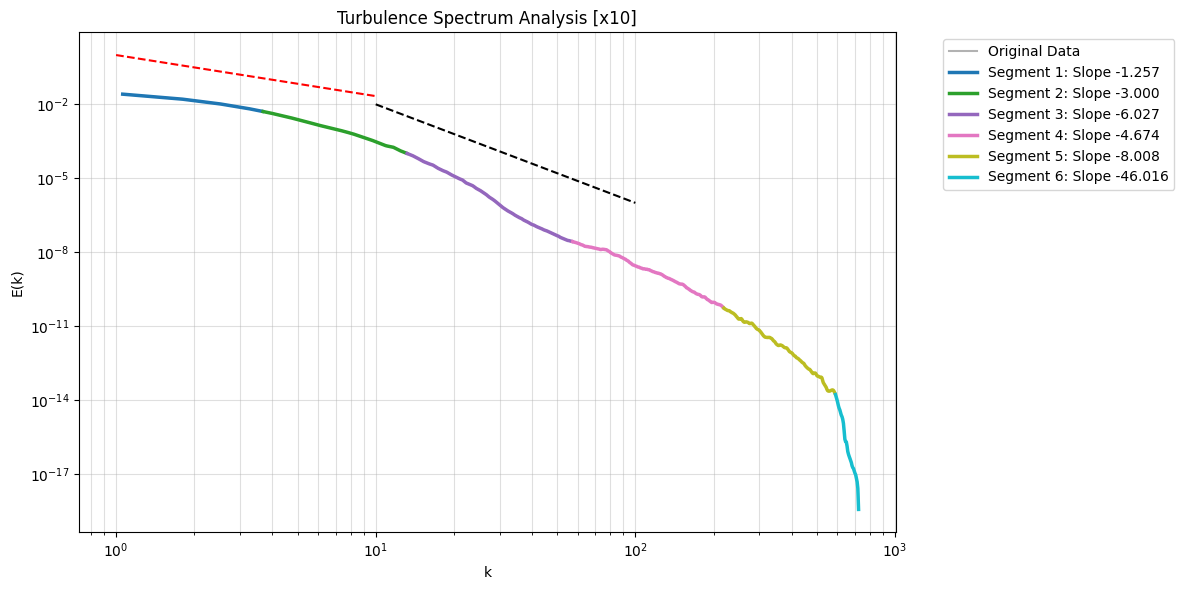

In [5]:
file = '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt'
print('Tracking 1')
tr.tracking(file, 10, 'x10')
compared_line()
print('Tracking 2')
tr.tracking2(file, 10, 'x10')
compared_line()


### Averaged across tume ###

In [6]:
all_ek = []

for file in files:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

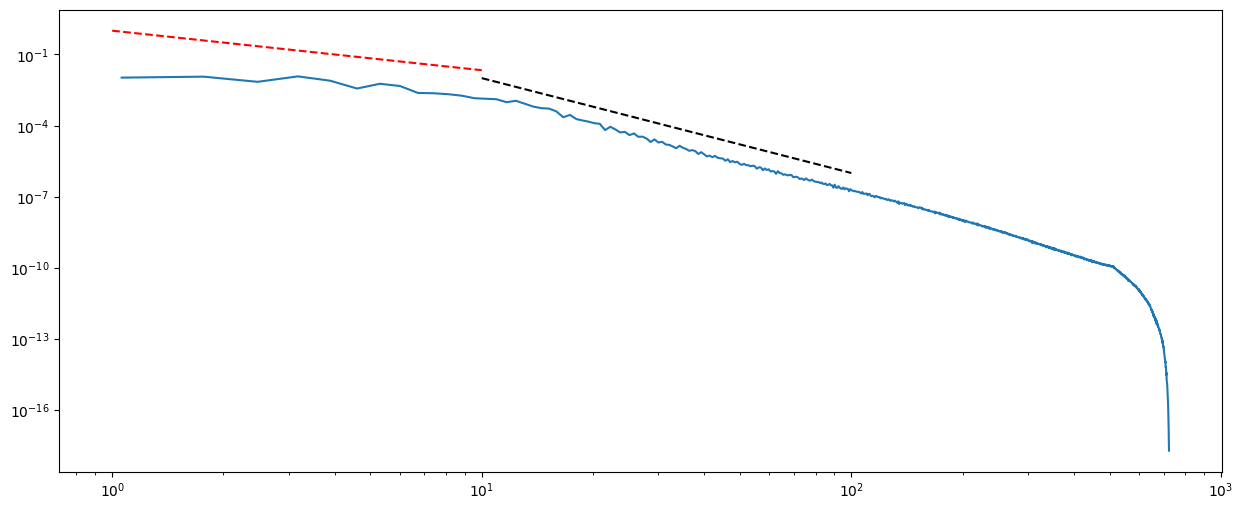

In [7]:
plt.figure(figsize=(15, 6))
plt.loglog(k,mean_ek)
compared_line()

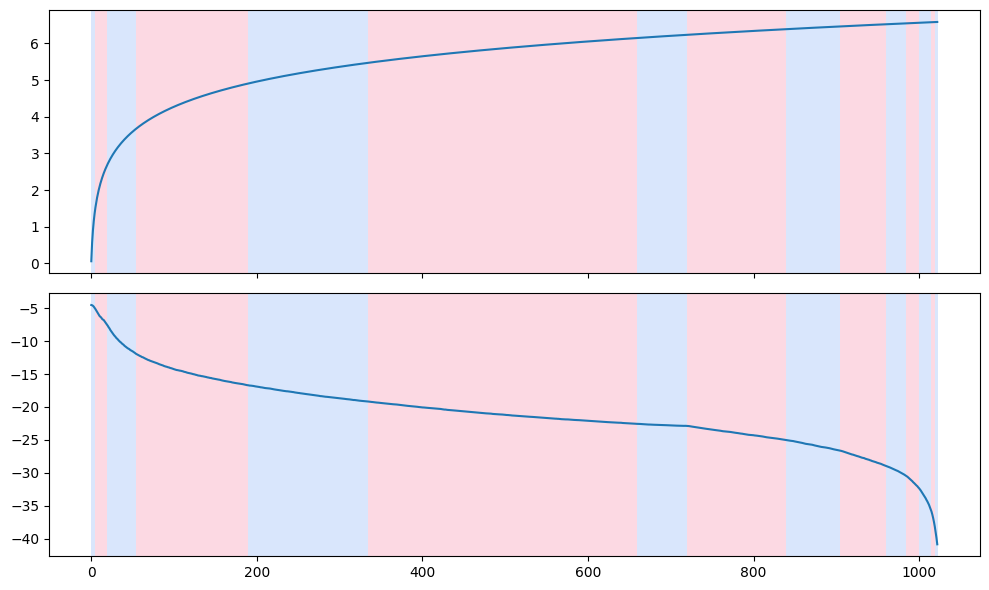

Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 20, k from 4.60e+00 to 1.45e+01
Segment 3: indices 20 to 55, k from 1.52e+01 to 3.92e+01
Segment 4: indices 55 to 190, k from 4.00e+01 to 1.35e+02
Segment 5: indices 190 to 335, k from 1.35e+02 to 2.37e+02
Segment 6: indices 335 to 660, k from 2.38e+02 to 4.67e+02
Segment 7: indices 660 to 720, k from 4.68e+02 to 5.09e+02
Segment 8: indices 720 to 840, k from 5.10e+02 to 5.94e+02
Segment 9: indices 840 to 905, k from 5.95e+02 to 6.40e+02
Segment 10: indices 905 to 960, k from 6.41e+02 to 6.79e+02
Segment 11: indices 960 to 985, k from 6.80e+02 to 6.97e+02
Segment 12: indices 985 to 1000, k from 6.98e+02 to 7.07e+02
Segment 13: indices 1000 to 1015, k from 7.08e+02 to 7.18e+02
Segment 14: indices 1015 to 1020, k from 7.19e+02 to 7.22e+02
Segment 15: indices 1020 to 1023, k from 7.22e+02 to 7.24e+02


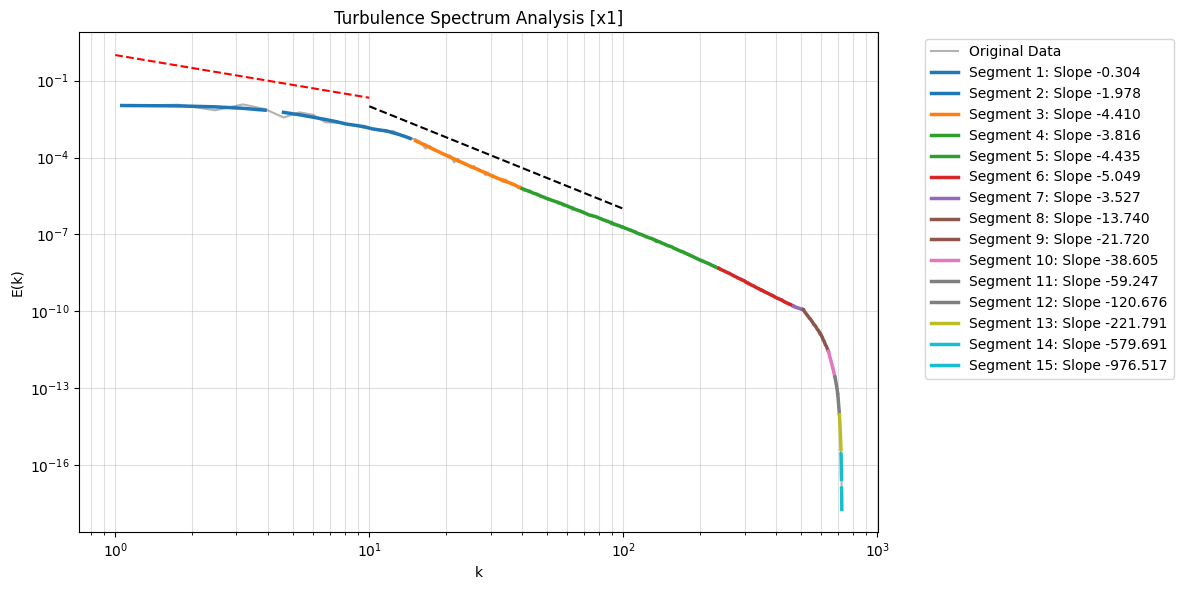

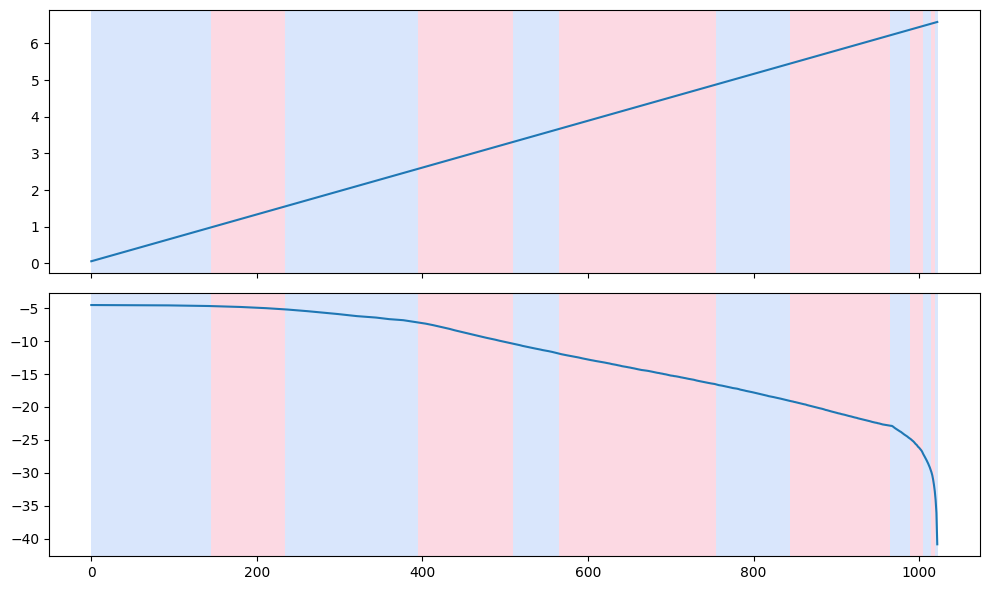

Found segments:
Segment 1: indices 0 to 145, k from 1.06e+00 to 2.66e+00
Segment 2: indices 145 to 235, k from 2.68e+00 to 4.73e+00
Segment 3: indices 235 to 395, k from 4.76e+00 to 1.31e+01
Segment 4: indices 395 to 510, k from 1.32e+01 to 2.74e+01
Segment 5: indices 510 to 565, k from 2.75e+01 to 3.89e+01
Segment 6: indices 565 to 755, k from 3.91e+01 to 1.31e+02
Segment 7: indices 755 to 845, k from 1.32e+02 to 2.32e+02
Segment 8: indices 845 to 965, k from 2.34e+02 to 5.00e+02
Segment 9: indices 965 to 990, k from 5.03e+02 to 5.86e+02
Segment 10: indices 990 to 1005, k from 5.90e+02 to 6.45e+02
Segment 11: indices 1005 to 1015, k from 6.49e+02 to 6.88e+02
Segment 12: indices 1015 to 1020, k from 6.92e+02 to 7.10e+02
Segment 13: indices 1020 to 1023, k from 7.15e+02 to 7.24e+02


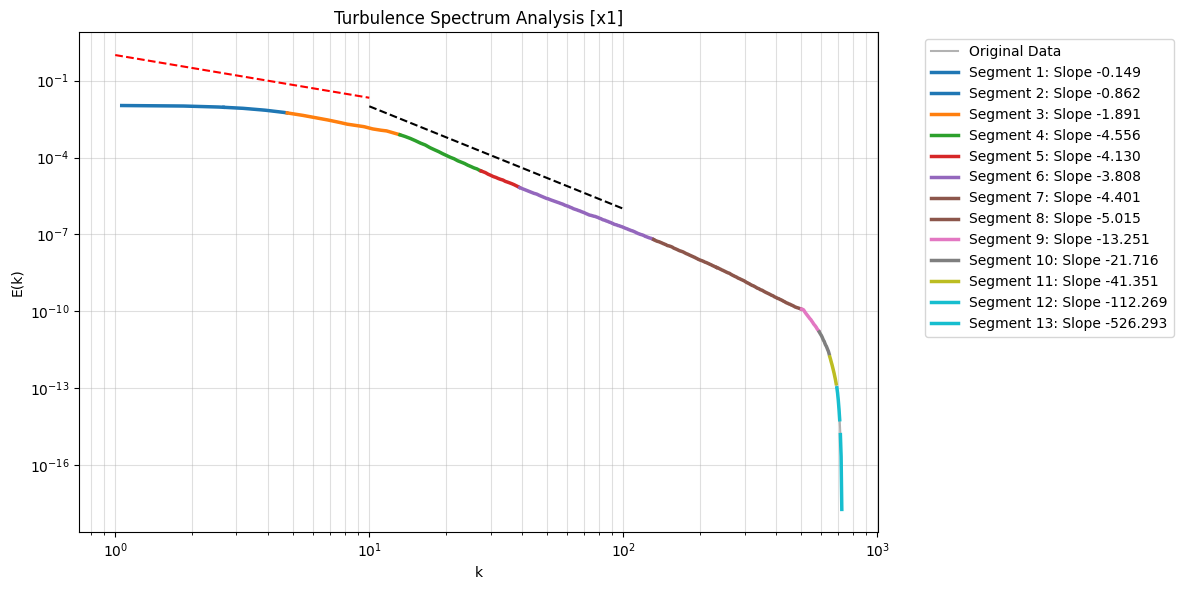

In [8]:
tr.tracking_data(k, mean_ek, 0.1, 'x1')
compared_line()
tr.tracking2_data(k, mean_ek, 0.1, 'x1')
compared_line()

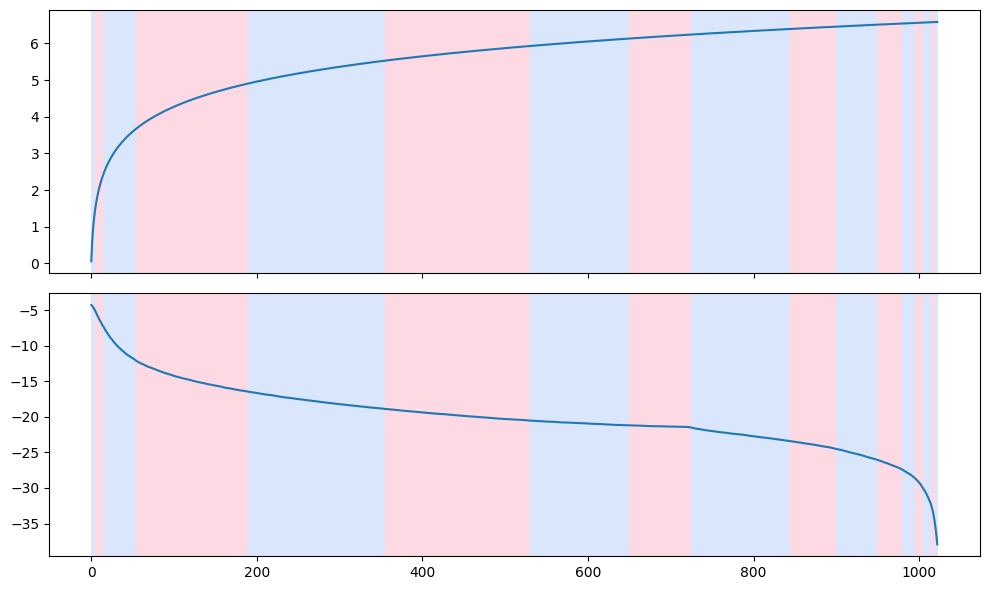

Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 15, k from 4.60e+00 to 1.10e+01
Segment 3: indices 15 to 55, k from 1.17e+01 to 3.92e+01
Segment 4: indices 55 to 190, k from 4.00e+01 to 1.35e+02
Segment 5: indices 190 to 355, k from 1.35e+02 to 2.51e+02
Segment 6: indices 355 to 530, k from 2.52e+02 to 3.75e+02
Segment 7: indices 530 to 650, k from 3.76e+02 to 4.60e+02
Segment 8: indices 650 to 725, k from 4.61e+02 to 5.13e+02
Segment 9: indices 725 to 845, k from 5.14e+02 to 5.98e+02
Segment 10: indices 845 to 900, k from 5.99e+02 to 6.37e+02
Segment 11: indices 900 to 950, k from 6.37e+02 to 6.72e+02
Segment 12: indices 950 to 980, k from 6.73e+02 to 6.93e+02
Segment 13: indices 980 to 995, k from 6.94e+02 to 7.04e+02
Segment 14: indices 995 to 1005, k from 7.05e+02 to 7.11e+02
Segment 15: indices 1005 to 1015, k from 7.12e+02 to 7.18e+02
Segment 16: indices 1015 to 1020, k from 7.19e+02 to 7.22e+02
Segment 17: indices 1020 to 1023, k fr

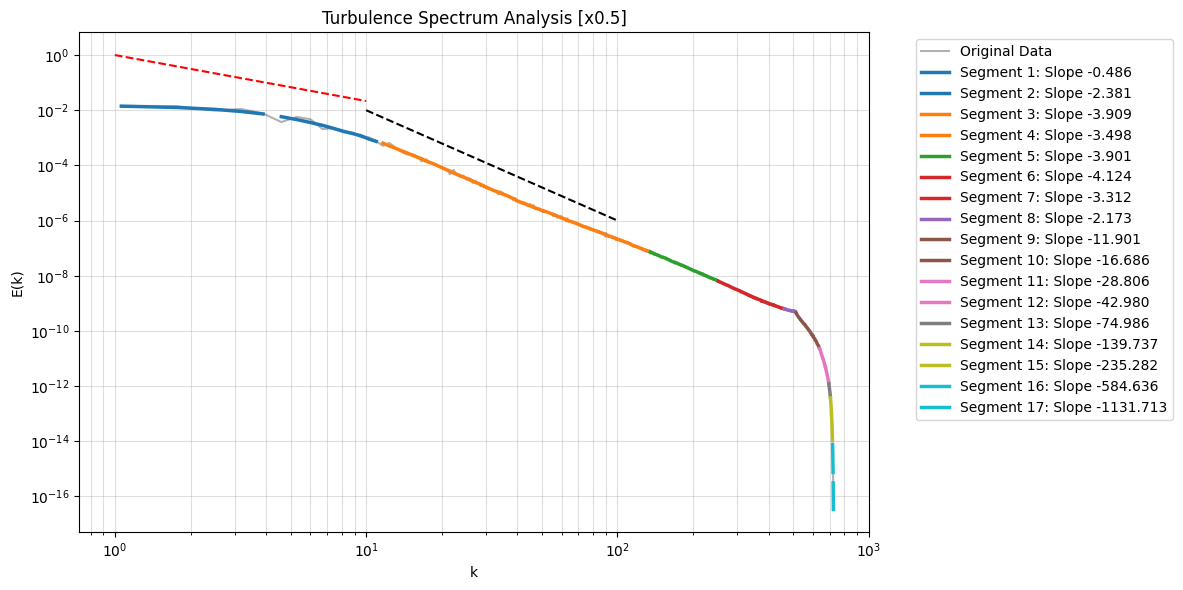

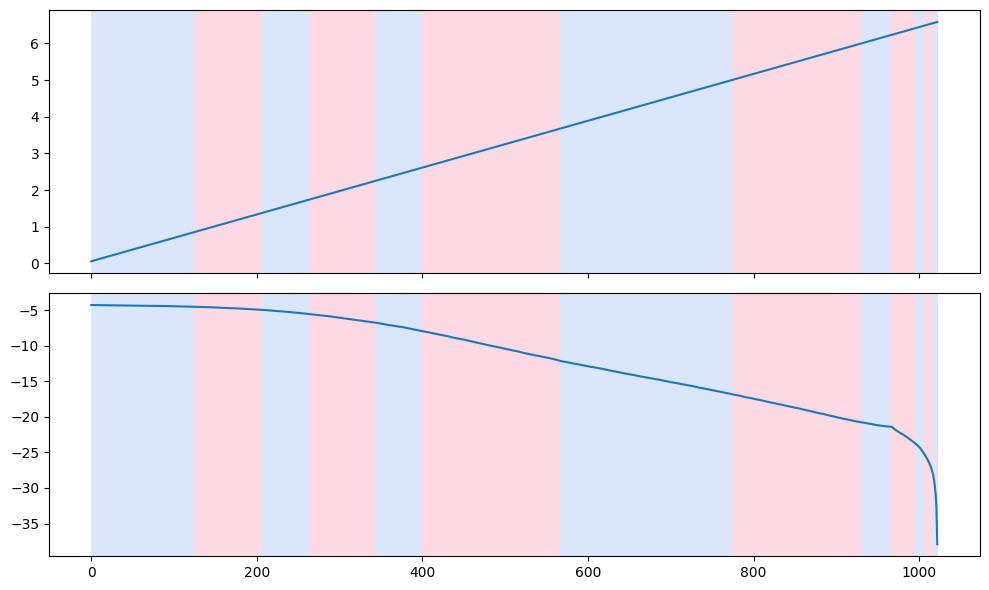

Found segments:
Segment 1: indices 0 to 125, k from 1.06e+00 to 2.34e+00
Segment 2: indices 125 to 205, k from 2.36e+00 to 3.90e+00
Segment 3: indices 205 to 265, k from 3.93e+00 to 5.72e+00
Segment 4: indices 265 to 345, k from 5.76e+00 to 9.54e+00
Segment 5: indices 345 to 400, k from 9.60e+00 to 1.36e+01
Segment 6: indices 400 to 565, k from 1.36e+01 to 3.89e+01
Segment 7: indices 565 to 775, k from 3.91e+01 to 1.49e+02
Segment 8: indices 775 to 930, k from 1.50e+02 to 4.00e+02
Segment 9: indices 930 to 965, k from 4.02e+02 to 5.00e+02
Segment 10: indices 965 to 995, k from 5.03e+02 to 6.05e+02
Segment 11: indices 995 to 1005, k from 6.09e+02 to 6.45e+02
Segment 12: indices 1005 to 1015, k from 6.49e+02 to 6.88e+02
Segment 13: indices 1015 to 1020, k from 6.92e+02 to 7.10e+02
Segment 14: indices 1020 to 1023, k from 7.15e+02 to 7.24e+02


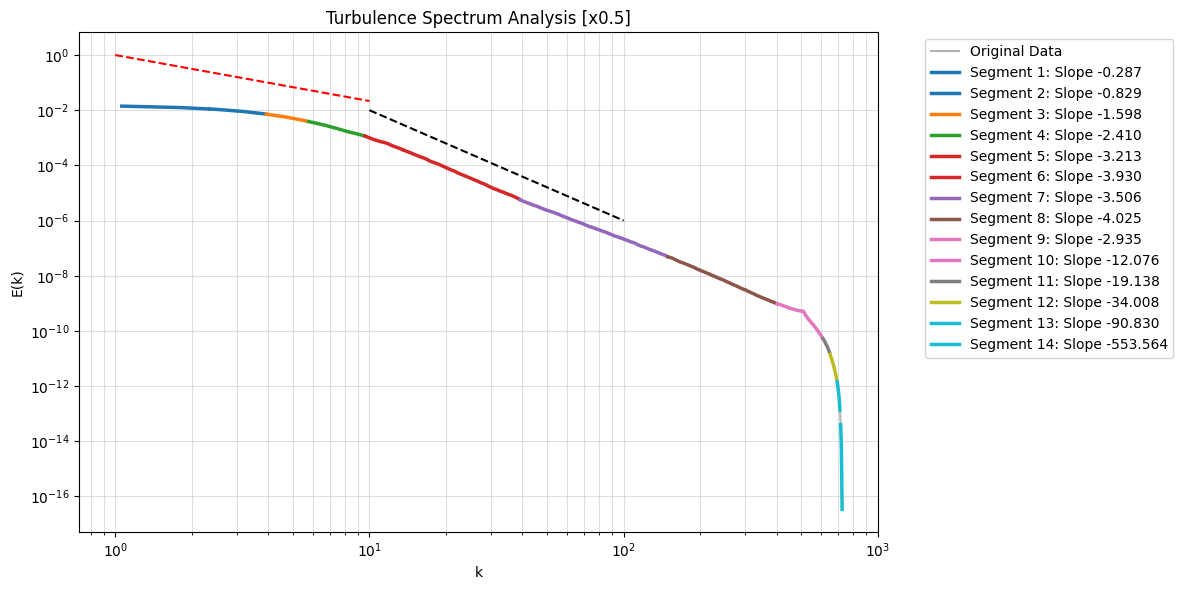

In [11]:
all_ek = []

for file in files3:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

tr.tracking_data(k, mean_ek, 0.05, 'x0.5')
compared_line()
tr.tracking2_data(k, mean_ek, 0.05, 'x0.5')
compared_line()


In [ ]:
all_ek = []

for file in files4:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

tr.tracking_data(k, mean_ek, 0.05, 'x2')
compared_line()
tr.tracking2_data(k, mean_ek, 0.05, 'x2')
compared_line()
